# Data Analysis for Satellites

### fdf
>sd

#import modules 

import xlrd
import pandas as pd 
import numpy as np 
import random
import plotly.graph_objects as go
from numpy import nan as NA 
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

In [2]:
#Read data from excel
satellite_read_data = pd.read_excel('C:\\Users\\Smit\\Documents\\NCI\\Semester 1\\Database and Analytical Programming\\Project\\Data set\\Satellite_Database.xlsx') 

# Data set

In [3]:
#Display first 5 rows and columns to check the data
satellite_read_data.head()

,"Name_of_Satellite,Alternate_Names",Country/Org_of_UN_Registry,Country_of_Operator/Owner,Operator/Owner,Users,Purpose,Detailed_Purpose,Class_of_Orbit,Type_of_Orbit,Longitude_of_GEO__degrees,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Copying Satellite data to a different data frame
satellite_data = satellite_read_data.copy()

In [5]:
#Print satellite_data
satellite_data

,"Name_of_Satellite,Alternate_Names",Country/Org_of_UN_Registry,Country_of_Operator/Owner,Operator/Owner,Users,Purpose,Detailed_Purpose,Class_of_Orbit,Type_of_Orbit,Longitude_of_GEO__degrees,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"ABS-4 (ABS-2i, MBSat, Mobile Broadcasting Sate...",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"ABS-6 (ABS-1, LMI-1, Lockheed Martin-Intersput...",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,159.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"ABS-7 (Koreasat 3, Mugungwha 3)",South Korea,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,116.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Advanced Orion 2 (Mentor, NROL 6, USA 139)",USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,NaN,-26.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre-processing

In [6]:
#Deleting unwanted columns using drop method

satellite_data.drop(["Detailed_Purpose", "Type_of_Orbit","Longitude_of_GEO__degrees","Eccentricity","Inclination__degrees",
                    "Period__minutes","Launch_Mass__kg.","Dry_Mass__kg.","Power__watts","Date_of_Launch",
                    "Expected_Lifetime__yrs.","Launch_Site","COSPAR_Number","NORAD_Number","Comments","Source_Used_for_Orbital_Data",
                    "Source","Source","Source","Source","Source","Source"], axis = 1, inplace = True)

In [7]:
#Display of Data after initial drop of columns
satellite_data

,"Name_of_Satellite,Alternate_Names",Country/Org_of_UN_Registry,Country_of_Operator/Owner,Operator/Owner,Users,Purpose,Class_of_Orbit,Perigee__km,Apogee__km,Contractor,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,LEO,476,500,Universitat Politècnica de Catalunya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,LEO,497,517,University of Aalto,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,LEO,442,687,University of Aalborg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,35778,35793,Space Systems/Loral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,35700,35700,Boeing Satellite Systems,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,35788,35803,Boeing Satellite Systems,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"ABS-4 (ABS-2i, MBSat, Mobile Broadcasting Sate...",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,35780,35793,Space Systems/Loral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"ABS-6 (ABS-1, LMI-1, Lockheed Martin-Intersput...",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,35777,35794,Lockheed Martin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"ABS-7 (Koreasat 3, Mugungwha 3)",South Korea,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,35780,35791,Lockheed Martin Astro Space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Advanced Orion 2 (Mentor, NROL 6, USA 139)",USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,GEO,35560,36013,TRW Space and Electronics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Another round of deleting unwanted columns
satellite_data.drop(["Source.1","Source.2","Source.3","Source.4","Source.5","Unnamed: 27","Unnamed: 35","Unnamed: 36","Unnamed: 37","Unnamed: 38",
                    "Unnamed: 39","Unnamed: 40","Unnamed: 41","Unnamed: 42","Unnamed: 43","Unnamed: 44","Unnamed: 45",
                    "Unnamed: 46","Unnamed: 47","Unnamed: 48","Unnamed: 49","Unnamed: 50","Unnamed: 51","Unnamed: 52","Unnamed: 53",
                    "Unnamed: 54","Unnamed: 55","Unnamed: 56","Unnamed: 57","Unnamed: 58","Unnamed: 59","Unnamed: 60",
                    "Unnamed: 61","Unnamed: 62", "Unnamed: 63","Unnamed: 64"], axis = 1, inplace = True)

In [9]:
#Displaying datasete after preprocessing
satellite_data.head()

,"Name_of_Satellite,Alternate_Names",Country/Org_of_UN_Registry,Country_of_Operator/Owner,Operator/Owner,Users,Purpose,Class_of_Orbit,Perigee__km,Apogee__km,Contractor,Country_of_Contractor,Launch_Vehicle
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,LEO,476,500,Universitat Politècnica de Catalunya,Spain,PSLV
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,LEO,497,517,University of Aalto,Finland,PSLV
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,LEO,442,687,University of Aalborg,Denmark,Soyuz 2.1a
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,35778,35793,Space Systems/Loral,USA,Ariane 5 ECA
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,35700,35700,Boeing Satellite Systems,USA,Falcon 9


# Plot 1: Pie Chart

In [10]:
top_10 = satellite_data['Country_of_Operator/Owner'].value_counts()[:10]

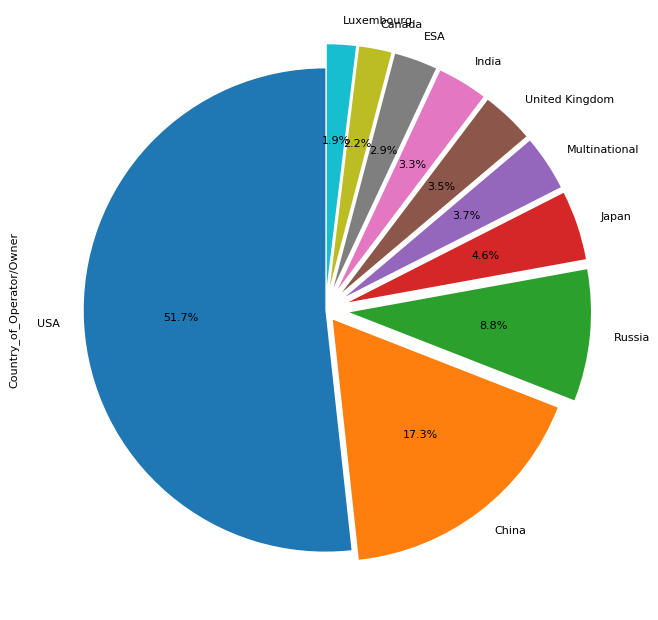

In [13]:
#matplotlib
explode = (0,0.05,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
figure(num=None, figsize=(60, 10), dpi=80)
top_10.plot.pie(explode=explode, autopct='%1.1f%%', startangle=90)

#Automatically saving the graph in the form of image
plt.savefig(r'C:\\Users\\Smit\\Documents\\NCI\\Semester 1\\Database and Analytical Programming\\Project\\Data set\\PieChart.jpg') 

# Plot 2: Bar Plot

In [16]:
#plotly
orbit=['LEO','GEO','MEO','Elliptical']
purpose=['Communications','Earth Observation','Technology Development','Navigation/Global Positioning']

#Setting the bar plots
fig = go.Figure(data=[
    go.Bar(name='Purpose', x=purpose, y=satellite_data['Purpose'].value_counts()),
    go.Bar(name='Orbit', x=orbit, y=satellite_data['Class_of_Orbit'].value_counts())
])

#Setting the Layout for Bar plot
fig.update_layout(
    title="For which purpose is the satellite majorly used and in which Orbit does it belong majorly",
    xaxis_title="Purpose and Orbit",
    yaxis_title="Count",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#41B883"
    )
)

#Automatically saving the graph in the form of image
plt.savefig(r'C:\\Users\\Smit\\Documents\\NCI\\Semester 1\\Database and Analytical Programming\\Project\\Data set\\BarPlot.jpg') 

# Plot 3: Distplot

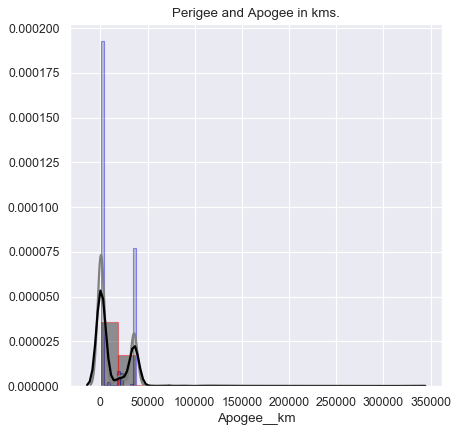

In [27]:
#Configuring the graph
figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

sns.set()

#Labelling X axis and the title
plt.title("Perigee and Apogee in kms.")
plt.xlabel("Perigee and Apogee in kms.")

#Plotting the distplot for Perigee
sns.distplot(satellite_data['Perigee__km'], hist=True, kde=True, 
             bins=int(180/10), color = 'gray', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 2})

#Plotting the distplot for Apogee
sns.distplot(satellite_data['Apogee__km'], hist=True, kde=True, 
             bins=int(180/10), color = 'black', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 2})

#Automatically saving the graph in the form of image
plt.savefig(r'C:\\Users\\Smit\\Documents\\NCI\\Semester 1\\Database and Analytical Programming\\Project\\Data set\\Distplot.jpg') 


# Plot 4: WorkCloud

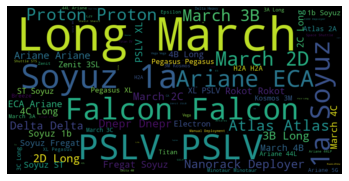

In [38]:
#Accepting data in form of string    
text = satellite_data["Launch_Vehicle"].to_string()

# Create the wordcloud object
wordcloud = WordCloud(width=800, height=400, margin=1).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

#Automatically saving the graph in the form of image
plt.savefig(r'C:\\Users\\Smit\\Documents\\NCI\\Semester 1\\Database and Analytical Programming\\Project\\Data set\\WorkCloud.jpg') 

# Custom Lollipop

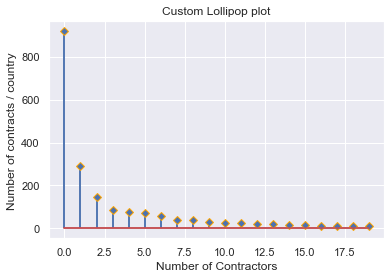

In [39]:
# create data
values = satellite_data["Country_of_Contractor"].value_counts()[:20]
 
# plot with no marker
plt.stem(values, markerfmt=' ',use_line_collection=True)

#Naming title, x and y axis
plt.title("Custom Lollipop plot")
plt.xlabel("Number of Contractors")
plt.ylabel("Number of contracts / country ")

# change color and shape and size and edges
(markers, stemlines, baseline) = plt.stem(values,use_line_collection=True)
plt.setp(markers, marker='D', markersize=5, markeredgecolor="orange", markeredgewidth=1)

#Automatically saving the graph in the form of image
plt.savefig(r'C:\\Users\\Smit\\Documents\\NCI\\Semester 1\\Database and Analytical Programming\\Project\\Data set\\CustomLollipop.jpg')